In [17]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
single_dataset = pd.merge (mouse_metadata, study_results, how = "outer", on="Mouse ID")

# Display the data table for preview
display(single_dataset)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
 # Checking the number of mice.
unique_id = len(single_dataset["Mouse ID"].unique())
print("Number of mice: " + str(unique_id))


Number of mice: 249


In [4]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
 # Comment: Eliminating duplicate Mice ID and Timepoint combo does not alter the number of mice.
non_duplicates = single_dataset.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = False).reset_index(drop = True)
non_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1878,z969,Naftisol,Male,9,30,25,63.145652,2
1879,z969,Naftisol,Male,9,30,30,65.841013,3
1880,z969,Naftisol,Male,9,30,35,69.176246,4
1881,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
the_duplicates = single_dataset[single_dataset[['Mouse ID', 'Timepoint']].duplicated(keep = False) == True]
the_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Generate a summary statistics table consisting of the mean, median, variance, standard deviation, 
# and SEM of the tumor volume for *each drug regimen*.
# Data frame is non_duplicates
tv_mean = non_duplicates.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
# NOT NECESSARY ANYMORE Drop extra columns df.drop(['B', 'C'], axis=1)
# Rename Column
tv_mean = tv_mean.reset_index()
tv_mean = tv_mean.rename(columns={"Tumor Volume (mm3)":"Mean"})
# Same for the rest of statistics
# Median
tv_median = non_duplicates.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tv_median = tv_median.reset_index()
tv_median = tv_median.rename(columns={"Tumor Volume (mm3)":"Median"})
# Variance
tv_var = non_duplicates.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tv_var = tv_var.reset_index()
tv_var = tv_var.rename(columns={"Tumor Volume (mm3)":"Variance"})
# Standard Deviation
tv_std = non_duplicates.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tv_std = tv_std.reset_index()
tv_std = tv_std.rename(columns={"Tumor Volume (mm3)":"St Dev"})
# SEM
tv_sem = non_duplicates.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tv_sem = tv_sem.reset_index()
tv_sem = tv_sem.rename(columns={"Tumor Volume (mm3)":"SEM"})
# Using the aggregation method, produce the same summary statistics in a single line
# Integrate the table
# Just realized in could've a lot simpler
tv_mean["Median"] = tv_median["Median"]
tv_mean["Variance"] = tv_var["Variance"]
tv_mean["St Dev"] = tv_std["St Dev"]
tv_mean["SEM"] = tv_sem["SEM"]
tv_mean

,Drug Regimen,Mean,Median,Variance,St Dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


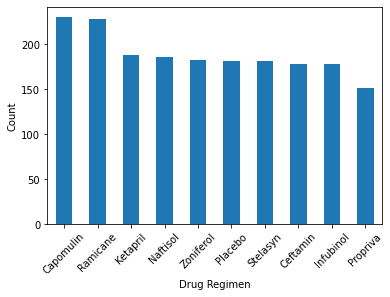

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
counts = non_duplicates["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

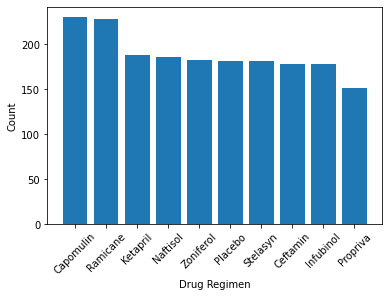

In [8]:
 # Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
counts = non_duplicates["Drug Regimen"].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

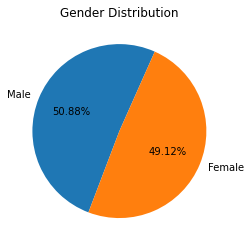

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
m_f = non_duplicates["Sex"].value_counts()
pie_sex_mice = m_f.plot.pie(autopct="%1.2f%%", startangle=66, title="Gender Distribution")
pie_sex_mice.set_ylabel('');

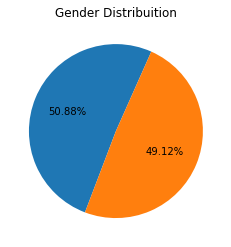

In [40]:
 # Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_mice = non_duplicates['Sex'].value_counts()
pie_sex_mice
plt.title("Gender Distribuition")
labels = ["Male", "Female"]
plt.pie(sex_mice, autopct="%1.2f%%",  startangle=66);

 Quartiles, Outliers and Boxplots


In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = pd.DataFrame(non_duplicates.groupby('Mouse ID')['Timepoint'].max())
greatest_tp.rename(columns = {'Timepoint':'Greatest TP'}, inplace = True)
# greatest_tp
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
gr_tp_m = pd.merge(non_duplicates, greatest_tp, how='outer', on='Mouse ID')
gr_tp_m

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest TP
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1878,z969,Naftisol,Male,9,30,25,63.145652,2,45
1879,z969,Naftisol,Male,9,30,30,65.841013,3,45
1880,z969,Naftisol,Male,9,30,35,69.176246,4,45
1881,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds